## Uppgifter
Alla grafer ska exporteras till en undermapp som heter visualiseringar i ditt repo för labben. Exportera
matplotlib/seaborngrafer i png-format och plotly-grafer som html-filer. Ge relevanta namn till dina filer så det blir lätt att
referera till dem. Notera att du behöver ställa in bakgrundsfärg när du sparar matplotlibgrafer, annars blir de
transparenta och svåra att läsa.
Tänk på data storytelling, graferna du skapar ska ha lämpliga rubriker, labels, annoteringar, clutter ska tas bort, jobba
med attention mha färger mm.

## Uppgift 0 - uppvärmning med riket
- I den här uppgiften ska du visualisera med hjälp av matplotlib och/eller seaborn

a) Börja med att läsa in filen riket2023_åk9_np.xlsx och sheets för de olika ämnena. Ändra kolumnnamnen på
respektive dataframe så du får något liknande som nedan.






In [68]:
import pandas as pd

# Definiera de ämnen (sheets) som läses in från Excel-filen
subjects = ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"]

excel_file = pd.ExcelFile("../data/riket2023_åk9_np.xlsx")

# Dictionary för att hålla DataFrames för varje ämne
dataframes = {}

# För varje ämne, läser in fliken och ändrar kolumnnamnen
for subject in subjects:
    # Läser in data från fliken för det aktuella ämnet
    df_riket = excel_file.parse(sheet_name=subject, skiprows=8)
    
    # Tilldelar nya kolumnnamn
    df_riket.columns = ["Plats", "Huvudman", "Totalt", "Flickor (A-F)", "Pojkar (A-F)",
                  "Totalt (A-E)", "Flickor (A-E)", "Pojkar (A-E)",
                  "Totalt (poäng)", "Flickor (poäng)", "Pojkar (poäng)"]
    
    # Sparar DataFrame i dictionary med ämnesnamnet som nyckel
    dataframes[subject] = df_riket   

(dataframes["Svenska"])

,Plats,Huvudman,Totalt,Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,93225,45800,47425,96.1,97.9,94.4,13.6,14.5,12.7
1,Riket,Kommunal,72771,35484,37287,95.7,97.6,93.8,13.3,14.3,12.4
2,Riket,Enskild,20414,10297,10117,97.6,98.7,96.6,14.4,15.2,13.5
3,Riket,Skolverket,40,19,21,100.0,100.0,100.0,15.0,15.9,14.2


In [69]:
# Data för betyg totalt men också i procentform för de som fått A-E. Där har jag också gjort om det till decimail så man kan räkna på det
elevbetyg_totalt = 106766
flickor_totalt_betyg = 51548
pojkar_totalt_betyg = 55218
betyg_A_E_totalt = 89.1 / 100
betyg_A_E_flickor = 88.7 / 100
betyg_A_E_pojkar = 89.5 / 100

# Beräknar det faktiska antalet elever med A-E betyg
betyg_A_E_totalt = elevbetyg_totalt * betyg_A_E_totalt
betyg_A_E_flickor = flickor_totalt_betyg * betyg_A_E_flickor
betyg_A_E_pojkar = pojkar_totalt_betyg * betyg_A_E_pojkar

# Beräknar antalet elever med F betyg samt avrundar
antal_F_totalt = round(elevbetyg_totalt - betyg_A_E_totalt)
antal_F_flickor = round(flickor_totalt_betyg - betyg_A_E_flickor)
antal_F_pojkar = round(pojkar_totalt_betyg - betyg_A_E_pojkar)

resultat=print(f"Totalt antal elever som har fått F i matematik: {antal_F_totalt}\n"
        f"Antal flickor som har fått F i matematik: {antal_F_flickor}\n"
        f"Antal pojkar som har fått F i matematik: {antal_F_pojkar}")

Totalt antal elever som har fått F i matematik: 11637
Antal flickor som har fått F i matematik: 5825
Antal pojkar som har fått F i matematik: 5798


c) Rita ett stapeldiagram på totala poängen för de olika ämnena.


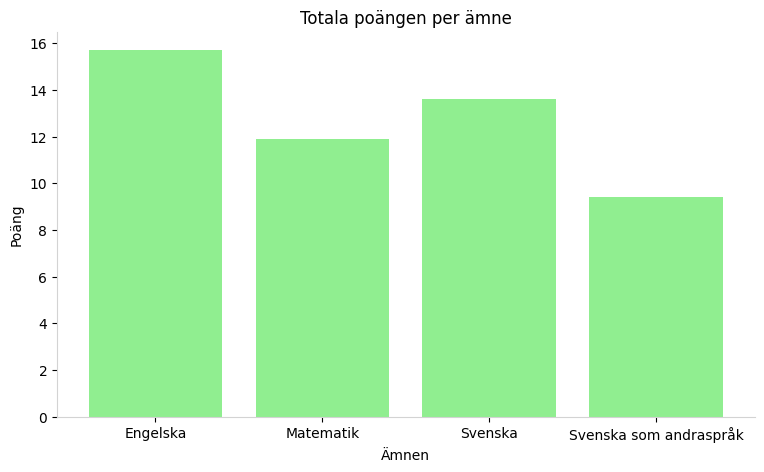

In [89]:
import matplotlib.pyplot as plt

subjects = ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk"]
points = [15.7, 11.9, 13.6, 9.4]  

plt.figure(figsize=(9, 5))
plt.bar(subjects, points, color="Lightgreen")
plt.title("Totala poängen per ämne")
plt.xlabel("Ämnen")
plt.ylabel("Poäng")

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_color("lightgray")
plt.gca().spines["bottom"].set_color("lightgray")

plt.savefig("Labb2_visualiseringar/upg_c.png")
plt.show()



d) Rita fyra olika stapeldiagram i subplots på totala poängen för de olika ämnena för de olika huvudmännen.


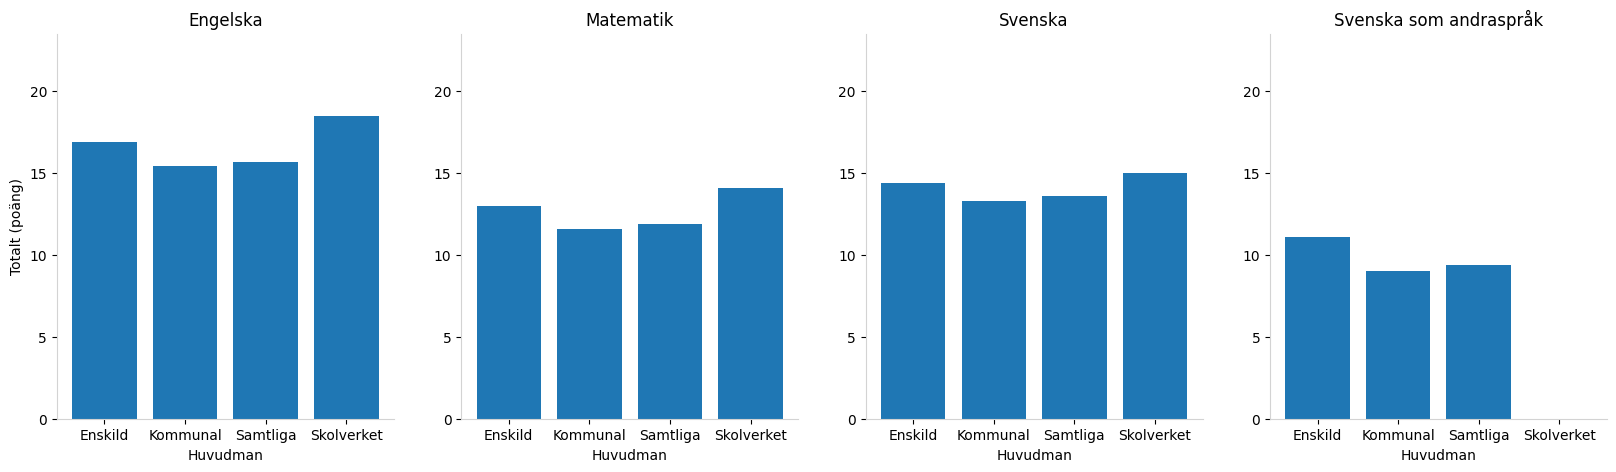

In [88]:
# Konvertera 'Totalt (poäng)' till flyttal för varje DataFrame
for df in dataframes.values():
    df["Totalt (poäng)"] = pd.to_numeric(df["Totalt (poäng)"], errors='coerce')

# Skapar en figur och subplots för varje ämne
fig, axs = plt.subplots(1, len(subjects), figsize=(20, 5))

# Hittar det högsta värdet bland alla staplar i alla DataFrames
max_y_value = max(df['Totalt (poäng)'].max() for df in dataframes.values()) + 5  # Lägger till 5 enheter


# Itererar över varje ämne och skapar ett stapeldiagram i varje subplot
for i, subject in enumerate(subjects):
    df_subject = dataframes[subject]
    # Vi grupperar data efter 'Huvudman' och beräknar summan av 'Totalt (poäng)'
    df_grouped = df_subject.groupby("Huvudman")["Totalt (poäng)"].sum().reset_index()
    # Skapar stapeldiagrammet
    axs[i].bar(df_grouped["Huvudman"], df_grouped["Totalt (poäng)"])
    axs[i].set_title(subject)
    axs[i].set_xlabel("Huvudman")
    axs[i].set_ylim(0, max_y_value)  # Justerar y-axeln enligt det beräknade maxvärdet
    if i == 0:  # Sätter y-axelns etikett endast för första subploten
        axs[i].set_ylabel("Totalt (poäng)")

    axs[i].spines["top"].set_visible(False)
    axs[i].spines["right"].set_visible(False)
    axs[i].spines["left"].set_color("lightgray")
    axs[i].spines["bottom"].set_color("lightgray")

plt.savefig("Labb2_visualiseringar/upg_d.png")
plt.show()



## Uppgift 1 - uppvärmning betyg och prov
I uppgifterna nedan ska du använda dig av datasetet betyg_o_prov_riksnivå.xlsx. Använd Plotly för att rita diagrammen
nedan för de uppgifter som kräver diagram. Använd Pandas för att svara på frågor om datasetet.


a) Rita ett linjediagram för andel elever som saknar godkänt betyg i ett eller fler ämnen för läsår 18-23. Ta med totalt,
flickor och pojkar i samma graf.

In [72]:
import plotly.express as px

# Läs in din data
df = pd.read_excel("../data/betyg_o_prov_riksnivå.xlsx", skiprows=9)

# Uppdatera kolumnnamnen
df.columns = [
    "Läsår", 
    "Totalt antal elever", 
    "Flickor", 
    "Pojkar", 
    "Totalt antal elever med slutbetyg", 
    "Flickor med slutbetyg", 
    "Pojkar med slutbetyg", 
    "Totalt antal elever med godkända slutbetyg", 
    "Flickor med godkända slutbetyg", 
    "Pojkar med godkända slutbetyg"
]
# Filtrera bort rader som inte matchar det förväntade läsårsformatet som t.ex. 2019/20
df = df[df['Läsår'].str.contains('^\d{4}/\d{2}$', na=False)]

# Extraherar startåret och lägger till 1 för att få slutåret
df['Läsår'] = df['Läsår'].str.slice(0, 4).astype(int)


# Beräkna andelen elever utan godkända betyg
df["Andel ej godkända Totalt"] = (1 - df["Totalt antal elever med godkända slutbetyg"] / df["Totalt antal elever"]) * 100
df["Andel ej godkända Flickor"] = (1 - df["Flickor med godkända slutbetyg"] / df["Flickor"]) * 100
df["Andel ej godkända Pojkar"] = (1 - df["Pojkar med godkända slutbetyg"] / df["Pojkar"]) * 100

# Skapar linjediagrammet
fig = px.line(df, x="Läsår", y=["Andel ej godkända Totalt", "Andel ej godkända Flickor", "Andel ej godkända Pojkar"],
              labels={"value": "Andel ej godkända (%)", "variable": "Kategori"},
              title="Andel elever utan godkända betyg")

# Tar bort onödigt mellanrum mellan heltalsåren och utökar x-axelns intervall
fig.update_xaxes(dtick=1,range=[2018,2023])
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.write_html("Labb2_visualiseringar/upg1_a.html")
fig.show()


b) Rita ett linjediagram för meritvärde för 16 ämnen för totalt, flickor och pojkar för läsår 18-23.

In [73]:
df = pd.read_excel("../data/betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1B", usecols="A:D")

df.columns = [
    "Läsår", 
    "Totalt meritvärde 16 ämnen", 
    "Flickor meritvärde 16 ämnen", 
    "Pojkar meritvärde 16 ämnen"
]

# Filtrera bort rader som inte matchar det förväntade läsårsformatet som t.ex. 2019/20
df = df[df['Läsår'].str.contains('^\d{4}/\d{2}$', na=False)]

# Extraherar startåret och lägger till 1 för att få slutåret
df['Läsår'] = df['Läsår'].str.slice(0, 4).astype(int)

# Skapar linjediagrammet
fig = px.line(df, x="Läsår", y=["Totalt meritvärde 16 ämnen", "Flickor meritvärde 16 ämnen", "Pojkar meritvärde 16 ämnen"],
              labels={"value": "Meritvärde", "variable": "Kategori"},
              title="Genomsnittligt meritvärde för 16 ämnen")

# Sätter axelns intervall från 2018 till 2023 för att inkludera hela dataserien
fig.update_xaxes(dtick=1, range=[2018,2023])
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_xaxes(tickfont=dict(color="#999"))
fig.update_yaxes(tickfont=dict(color="#999"))
fig.write_html("Labb2_visualiseringar/upg1_b.html")
fig.show()

c) Undersök nu andra variabler, och hur de påverkar meritvärde och andel med minst ett saknat betyg. Data finns för
läsår 22/23. Exempel kan man undersöka föräldrarnas utbildningsbakgrund. Rita lämpliga grafer.


In [74]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Skapa en figur för meritvärde
fig_merit = make_subplots(rows=1, cols=3, subplot_titles=('Förgymnasial utbildning', 'Gymnasial utbildning', 'Eftergymnasial utbildning'))

# Lägger till stapeldiagram för meritvärde för varje utbildningsnivå
# Förgymnasial utbildning
fig_merit.add_trace(go.Bar(x=['Totalt', 'Flickor', 'Pojkar'], y=[163.8, 172.2, 155.8], name='Förgymnasial'), row=1, col=1)
# Gymnasial utbildning
fig_merit.add_trace(go.Bar(x=['Totalt', 'Flickor', 'Pojkar'], y=[197.4, 207.2, 188.2], name='Gymnasial'), row=1, col=2)
# Eftergymnasial utbildning
fig_merit.add_trace(go.Bar(x=['Totalt', 'Flickor', 'Pojkar'], y=[239.1, 247.9, 230.7], name='Eftergymnasial'), row=1, col=3)

# Uppdatera layout för meritvärdediagrammet
fig_merit.update_yaxes(title_text='Meritvärde', range=[0, 300], row=1, col=1)
fig_merit.update_yaxes(range=[0, 300], row=1, col=2)
fig_merit.update_yaxes(range=[0, 300], row=1, col=3)
fig_merit.update_xaxes(showgrid=False)
fig_merit.update_yaxes(showgrid=False)
fig_merit.update_xaxes(tickfont=dict(color="#999"))
fig_merit.update_yaxes(tickfont=dict(color="#999"))
fig_merit.write_html("Labb2_visualiseringar/upg1_c.html")
fig_merit.show()







In [75]:
# Skapa en figur för andelen saknat betyg
fig_saknat_betyg = make_subplots(rows=1, cols=3, subplot_titles=('Förgymnasial utbildning', 'Gymnasial utbildning', 'Eftergymnasial utbildning'))

# Förgymnasial utbildning
fig_saknat_betyg.add_trace(go.Bar(x=['Totalt', 'Flickor', 'Pojkar'], y=[63.5, 61.5, 65.3], name='Förgymnasial'), row=1, col=1)
# Gymnasial utbildning
fig_saknat_betyg.add_trace(go.Bar(x=['Totalt', 'Flickor', 'Pojkar'], y=[37.4, 35.2, 39.5], name='Gymnasial'), row=1, col=2)
# Eftergymnasial utbildning
fig_saknat_betyg.add_trace(go.Bar(x=['Totalt', 'Flickor', 'Pojkar'], y=[16.8, 16.1, 17.5], name='Eftergymnasial'), row=1, col=3)

# Uppdaterar layout för diagrammet med andelen saknat betyg
fig_saknat_betyg.update_yaxes(title_text='Andel saknat betyg (%)', range=[0, 100], row=1, col=1)
fig_saknat_betyg.update_yaxes(range=[0, 100], row=1, col=2)
fig_saknat_betyg.update_yaxes(range=[0, 100], row=1, col=3)
fig_saknat_betyg.update_xaxes(showgrid=False)
fig_saknat_betyg.update_yaxes(showgrid=False)
fig_saknat_betyg.update_xaxes(tickfont=dict(color="#999"))
fig_saknat_betyg.update_yaxes(tickfont=dict(color="#999"))
fig_saknat_betyg.write_html("Labb2_visualiseringar/upg1_c1.html")

fig_saknat_betyg.show()



## Uppgift 2 - KPIer & EDA
Definiera 3-6 KPIer utöver de som använts i ovanstående uppgifter och gör explorativ dataanalys på en eller flera
dataset som ni får söka själva. Ni får inte ta dataseten som ni redan jobbat med i uppgift 0 och 1. Excel och eller csv-filer
kan ni hitta i skolverkets statistik
Se till att dokumentera vad du undersöker med markdown kombinerad med kod i Jupyter notebook eller om du
använder Pythonskript, skriv en markdown vid sidan om. Dokumentera också vad du kommer fram till och spara alla
visualiseringar.

# Analys av Kostnader för Gymnasieskolor 2022

Denna genomgång fokuserar på att jämföra genomsnittliga kostnader per elev mellan olika huvudmän.

## Steg 1: Dataförberedelse

Vi inleder med att läsa in och förbereda datan. Detta innebär att vi filtrerar ut relevanta rader och kolumner för analys.

In [76]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

file_path = "../data/Gymnasieskola - Kostnader 2022 Riket.xlsx"
school_costs_clean = pd.read_excel(file_path, skiprows=6, nrows=10)
school_costs_clean = school_costs_clean.dropna(axis=1, how="all")

# Konsolidera alla "Enskild" till "Enskild - Samtliga", oavsett inriktning.
school_costs_clean["Typ av huvudman"] = school_costs_clean["Typ av huvudman"].apply(
    lambda x: "Enskild - Samtliga" if "Enskild" in x else x
)



Notera att jag konsoliderar kategorier för att förenkla analysen. Detta steg är avgörande för att undvika förvirring vid tolkning av data då det annars visar alla olika kategorier inom enskild vilket gjorde det svårt att avläsa.

## Steg 2: Analys och Visualisering av Genomsnittliga Kostnader per Elev

Vi börjar med att visualisera de genomsnittliga kostnaderna per elev för varje huvudman för att få en överblick av hur resurserna fördelas.

In [77]:
# Filtrera ut unika huvudmän för att undvika duplicationer
unique_huvudman = school_costs_clean.drop_duplicates(subset=["Typ av huvudman"])

# Skapa linjediagrammet
fig1 = px.line(unique_huvudman, x="Typ av huvudman", y="Totalt per elev", markers=True,
               title="Genomsnittlig kostnad per elev per huvudman",
               labels={"Totalt per elev": "Genomsnittlig kostnad per elev (SEK)", "Typ av huvudman": "Huvudman"})
fig1.update_xaxes(showgrid=False)
fig1.update_yaxes(showgrid=False)
fig1.update_xaxes(tickfont=dict(color="#999"))
fig1.update_yaxes(tickfont=dict(color="#999"))


fig1.write_html("Labb2_visualiseringar/upg2_first_graph.html")
fig1.show()


## Steg 3: Kostnadsfördelning per Elevkategori

Vi analyserar nu hur kostnaderna fördelas över olika kategorier såsom undervisning, lokaler, måltider m.m. för att identifiera var de största investeringarna görs.


In [78]:
# Definiera en lista med kostnadskategorier som vi vill analysera per elev.
cost_categories = [
    "Undervisning per elev",
    "Lokaler per elev",
    "Måltider per elev",
    "Lärverktyg per elev",
    "Elevhälsa per elev",
    "Övrigt per elev"
]


# Omvandla dataramen "school_costs_clean" för att ha en rad per kostnadskategori per huvudman.
costs_by_category = school_costs_clean.melt(
    id_vars=["Typ av huvudman"],
    value_vars=cost_categories,
    var_name="Kategori",
    value_name="Kostnad per elev"
)
# Extrahera unika värden av "Typ av huvudman"
unique_huvudmän = school_costs_clean["Typ av huvudman"].unique()

# Skapa en subplot-layout
fig2 = make_subplots(rows=1, cols=len(unique_huvudmän), specs=[[{"type": "domain"}] * len(unique_huvudmän)],
                     subplot_titles=unique_huvudmän)  # Titlar som unika huvudmän

# Skapa ett diagram för varje unik 'Typ av huvudman'
for index, huvudman in enumerate(unique_huvudmän, start=1):
    data_for_huvudman = costs_by_category[costs_by_category["Typ av huvudman"] == huvudman]
    category_sum = data_for_huvudman.groupby("Kategori")["Kostnad per elev"].sum().reset_index()

# Lägg till diagrammet till figuren
    fig2.add_trace(go.Pie(labels=category_sum["Kategori"], values=category_sum["Kostnad per elev"], name=huvudman), row=1, col=index)

# Uppdatera layouten med titel och legend.
fig2.update_layout(title_text="Kostnadsfördelning per elevkategori per huvudman", showlegend=True,
                   margin=dict(t=200, l=20, r=20, b=100))  # Justerade marginaler


fig2.write_html("Labb2_visualiseringar/upg2_second_graph.html")
fig2.show()


## Steg 4: Andel Kostnader för Läromedel och Utrustning

Slutligen undersöker vi andelen av kostnaderna som går till läromedel och utrustning, vilket ger insikter om investeringar i elevernas lärandemiljö.

In [79]:
# Beräknar andelen läromedel och utrustning (%)
school_costs_clean["Andel läromedel och utrustning (%)"] = (
    school_costs_clean["Lärverktyg per elev"] / school_costs_clean["Totalt per elev"]
) * 100

# Grupperar data efter "Typ av huvudman" och beräknar genomsnittet av andelen för varje huvudman
grouped_data = school_costs_clean.groupby("Typ av huvudman", as_index=False)["Andel läromedel och utrustning (%)"].mean()

# Skapar ett stapeldiagram
fig3 = px.bar(
    grouped_data,
    x="Typ av huvudman",
    y="Andel läromedel och utrustning (%)",
    color="Typ av huvudman",
    title="Andel av kostnader för läromedel och utrustning per huvudman",
    labels={"Andel läromedel och utrustning (%)": "Andel (%)", "Typ av huvudman": "Huvudman"}
)
fig3.update_xaxes(showgrid=False)
fig3.update_yaxes(showgrid=False)

fig3.update_xaxes(tickfont=dict(color="#999"))
fig3.update_yaxes(tickfont=dict(color="#999"))

fig3.write_html("Labb2_visualiseringar/upg2_third_graph.html")
fig3.show()

## Sammanfattning av Analysen

Denna analys har tillhandahållit en detaljerad översikt av de genomsnittliga kostnaderna per elev för olika huvudmän inom svenskt gymnasieskoleväsende under 2022, med en fördjupning i kostnadsfördelningen per elevkategori. Vi har observerat hur olika huvudmän allokerar sina resurser och hur en betydande del av investeringarna går till läromedel och utrustning.